In [34]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [35]:
csvFolder = '/home/alessio/k-nokick/csv'

file1 = 'Report_b-pulseAlongX_0.22_0000_populations.csv'
file2 = 'Report_b-pulseAlongX_0.22_0000_regions.csv'
file3 = 'Report_m-only_IR_longer_with_nac_2_1_0000_populations.csv'
file4 = 'Report_m-only_IR_longer_with_nac_2_1_0000_regions.csv'
file5 = 'Report_z-from_S1_without_pulse_0000_populations.csv'
file6 = 'Report_z-from_S1_without_pulse_0000_regions.csv'
file7 = 'Report_m-only_IR_longer_with_nac_2_1_phase_pi_0000_populations.csv'
file8 = 'Report_m-only_IR_longer_with_nac_2_1_phase_pi_0000_regions.csv'
file9 = 'Report_m-only_IR_longer_with_nac_2_1_inverted_phase_0000_populations.csv'
file10 = 'Report_m-only_IR_longer_with_nac_2_1_inverted_phase_0000_regions.csv'

In [36]:
df1 = pd.read_csv(os.path.join(csvFolder,file1))
df2 = pd.read_csv(os.path.join(csvFolder,file2))
df3 = pd.read_csv(os.path.join(csvFolder,file3))
df4 = pd.read_csv(os.path.join(csvFolder,file4))
df5 = pd.read_csv(os.path.join(csvFolder,file5))
df6 = pd.read_csv(os.path.join(csvFolder,file6))
df7 = pd.read_csv(os.path.join(csvFolder,file7))
df8 = pd.read_csv(os.path.join(csvFolder,file8))
df9 = pd.read_csv(os.path.join(csvFolder,file9))
df10 = pd.read_csv(os.path.join(csvFolder,file10))

In [37]:
df5.iloc[[300,-1]]

,Unnamed: 0,count,steps,fs,Norm Deviation,Kinetic,Potential,Total,Total deviation,Xpulse,...,Zpulse,0,1,2,3,4,5,6,7,8
300,300,300,60000,30.030054,0.009390,0.281326,5.398734,5.680060,0.108587,0.0,...,0.0,30.0301,0.000014,0.976988,0.003981,0.000151,0.000143,0.000028,0.000002,0.000001
1331,1331,1331,266200,133.233340,0.040894,0.523995,4.800771,5.324766,0.463881,0.0,...,0.0,133.2333,0.065868,0.830758,0.022788,0.000336,0.000097,0.000028,0.000007,0.000001


In [38]:
a = df5.iloc[[300,-1]]['Total']
a

300     5.680060
1331    5.324766
Name: Total, dtype: float64

In [39]:
def calcola(df,end_of_pulse_step,end_of_dyns_step,label):
    
    time = df.iloc[end_of_pulse_step]['fs']
    time2 = df.iloc[end_of_dyns_step]['fs']
    
    # population in S_0 labeled 1 in the graph
    a = df.iloc[[end_of_pulse_step,end_of_dyns_step]]['1']
    
    # this is the gain in population of S_0
    da = a.iloc[1] - a.iloc[0]
    
    # this is the population of S_1
    b = df.iloc[end_of_pulse_step]['2']
    
    # this is the ratio... how much S_1 goes back to S_0
    c = da/b
    
    total_initial = df.iloc[0]['Total']
    total_final = df.iloc[end_of_dyns_step]['Total']
    total = total_final - total_initial
    
    string = '{}\ntime of end pulse -> {:8.3f} fs\ntime of end dyn -> {:8.3f} fs\ngain in population S0 at the end_step: {:8.5f}\nS1 population after pulse: {:8.5f}\nRatio: {:8.5f}\nTotal = {:6.3f} Hartree\n\n'
        
    print(string.format(label,time,time2,da,b,c,total))
    return c
    
final_frame = 1400
    
aa = calcola(df1,300,final_frame,'UV')
bb = calcola(df3,300,final_frame,'IR')
cc = calcola(df7,300,final_frame,'IR_pi')
dd = calcola(df9,300,final_frame,'IR_INV')
#dd = calcola(df5,0,final_frame,'FC')

print (bb/aa)
print (aa/bb)
#print (bb/cc)

UV
time of end pulse ->   15.015 fs
time of end dyn ->   70.070 fs
gain in population S0 at the end_step:  0.00906
S1 population after pulse:  0.52335
Ratio:  0.01730
Total =  3.168 Hartree


IR
time of end pulse ->   15.015 fs
time of end dyn ->   70.070 fs
gain in population S0 at the end_step:  0.00303
S1 population after pulse:  0.07488
Ratio:  0.04045
Total =  2.532 Hartree


IR_pi
time of end pulse ->   15.015 fs
time of end dyn ->   70.070 fs
gain in population S0 at the end_step:  0.00307
S1 population after pulse:  0.07674
Ratio:  0.03998
Total =  2.529 Hartree


IR_INV
time of end pulse ->   15.015 fs
time of end dyn ->   70.070 fs
gain in population S0 at the end_step:  0.00260
S1 population after pulse:  0.09137
Ratio:  0.02842
Total =  2.492 Hartree


2.33800933863
0.427714288168


In [40]:
normalize = True

if normalize:
    FC_norm = df6['products'] + df6['reactants']
    IR_norm = df4['products'] + df4['reactants']
    UV_norm = df2['products'] + df2['reactants']
    IR2norm = df8['products'] + df8['reactants']
    IR3norm = df10['products'] + df10['reactants']
else:
    FC_norm,IR_norm,UV_norm = 1.0,1.0,1.0
    
FC_ratio = np.nan_to_num(df6['products']/df6['reactants'])*FC_norm
FC_fs = df6['fs']
IR_ratio = (df4['products']/df4['reactants'])*IR_norm
IR_fs = df4['fs']
IR2ratio = (df8['products']/df8['reactants'])*IR2norm
IR2fs = df8['fs']
IR3ratio = (df10['products']/df10['reactants'])*IR3norm
IR3fs = df10['fs']
UV_ratio = (df2['products']/df2['reactants'])*UV_norm
UV_fs = df2['fs']



IR_ratio.shape, IR2ratio.shape

((109,), (108,))

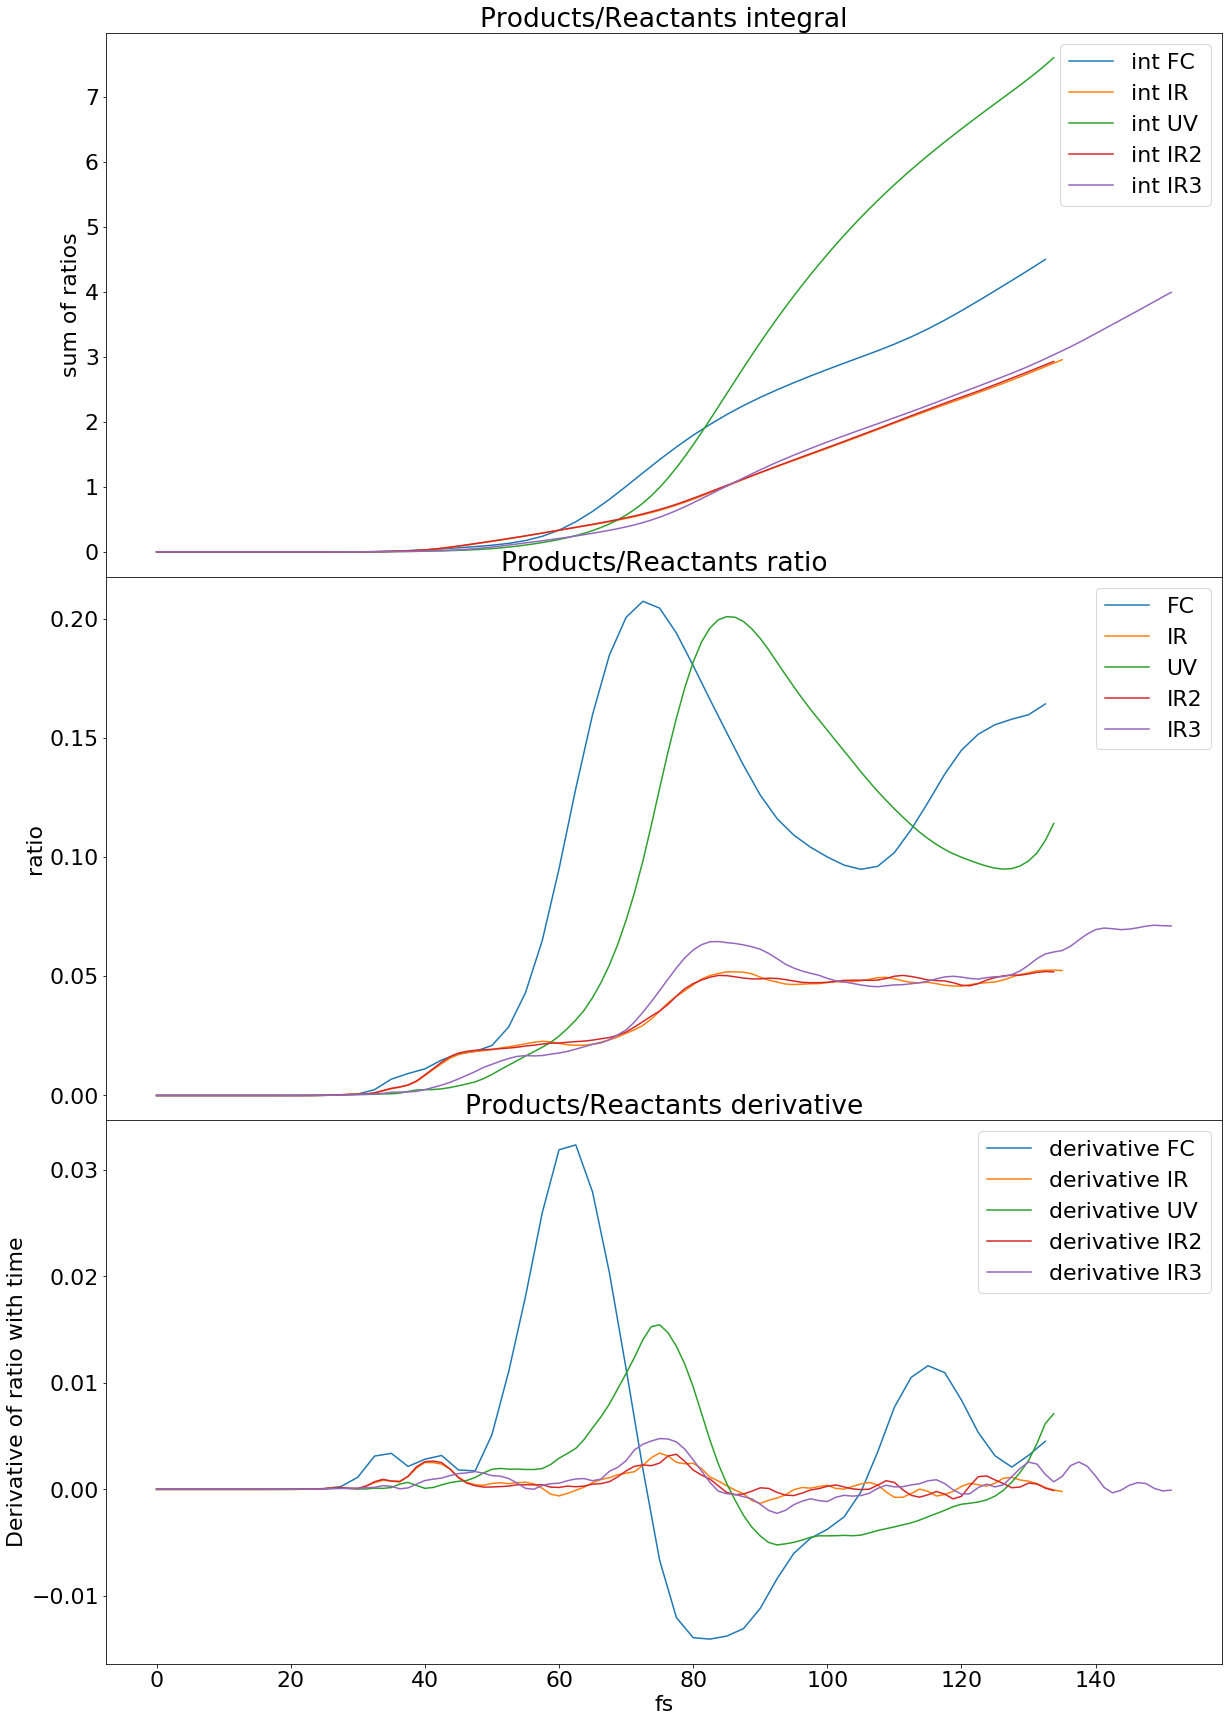

In [43]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

fig , [ax0,ax1,ax2] = plt.subplots(3, 1,sharex = True,figsize=(20,30))
fig.subplots_adjust(hspace=0)

ax0.plot(FC_fs,np.cumsum(FC_ratio),label='int FC')
ax0.plot(IR_fs,np.cumsum(IR_ratio),label='int IR')
ax0.plot(UV_fs,np.cumsum(UV_ratio),label='int UV')
ax0.plot(IR2fs,np.cumsum(IR2ratio),label='int IR2')
ax0.plot(IR3fs,np.cumsum(IR3ratio),label='int IR3')
ax0.set_title('Products/Reactants integral')
ax0.set_ylabel('sum of ratios')
ax0.legend()

ax1.plot(FC_fs,FC_ratio,label='FC')
ax1.plot(IR_fs,IR_ratio,label='IR')
ax1.plot(UV_fs,UV_ratio,label='UV')
ax1.plot(IR2fs,IR2ratio,label='IR2')
ax1.plot(IR3fs,IR3ratio,label='IR3')
ax1.set_title('Products/Reactants ratio')
ax1.set_ylabel('ratio')
ax1.legend()

ax2.plot(FC_fs,np.gradient(FC_ratio),label='derivative FC')
ax2.plot(IR_fs,np.gradient(IR_ratio),label='derivative IR')
ax2.plot(UV_fs,np.gradient(UV_ratio),label='derivative UV')
ax2.plot(IR2fs,np.gradient(IR2ratio),label='derivative IR2')
ax2.plot(IR3fs,np.gradient(IR3ratio),label='derivative IR3')
ax2.set_xlabel('fs')
ax2.set_title('Products/Reactants derivative')
ax2.set_ylabel('Derivative of ratio with time')
ax2.legend()



Text(0.5,0,'fs')

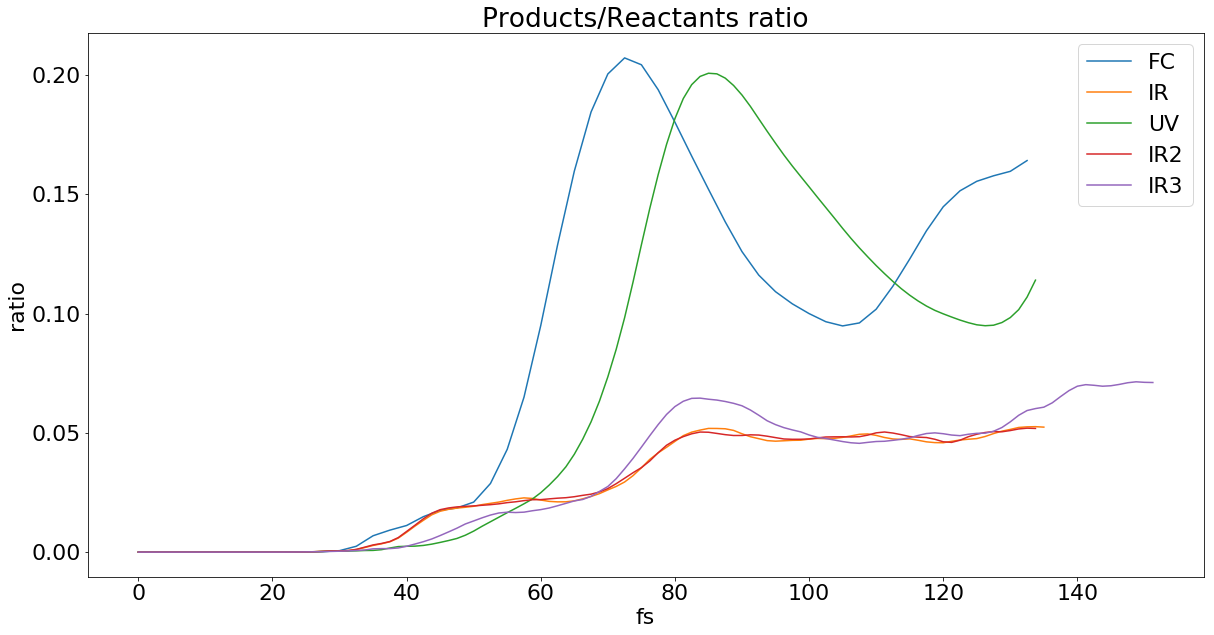

In [47]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

fig , ax1 = plt.subplots(1, 1,sharex = True,figsize=(20,10))
fig.subplots_adjust(hspace=0)

ax1.plot(FC_fs,FC_ratio,label='FC')
ax1.plot(IR_fs,IR_ratio,label='IR')
ax1.plot(UV_fs,UV_ratio,label='UV')
ax1.plot(IR2fs,IR2ratio,label='IR2')
ax1.plot(IR3fs,IR3ratio,label='IR3')
ax1.set_title('Products/Reactants ratio')
ax1.set_ylabel('ratio')
ax1.legend()
ax1.set_xlabel('fs')

In [28]:
df4.iloc[-1]['products']/df4.iloc[-1]['reactants']

0.53484502085661423

In [74]:
df2.iloc[-1]['products']/df2.iloc[-1]['reactants']

0.56782917687196044